In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd

'/Users/viveksasikumar/Downloads'

In [3]:
metadata = pd.read_csv('/Users/viveksasikumar/Downloads/movies_metadata.csv',low_memory=False,
                       parse_dates=True,infer_datetime_format=True)

In [4]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
metadata[['original_title','popularity','revenue','vote_average', 'vote_count']].head()

,original_title,popularity,revenue,vote_average,vote_count
0,Toy Story,21.946943,373554033.0,7.7,5415.0
1,Jumanji,17.015539,262797249.0,6.9,2413.0
2,Grumpier Old Men,11.7129,0.0,6.5,92.0
3,Waiting to Exhale,3.859495,81452156.0,6.1,34.0
4,Father of the Bride Part II,8.387519,76578911.0,5.7,173.0


In [6]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

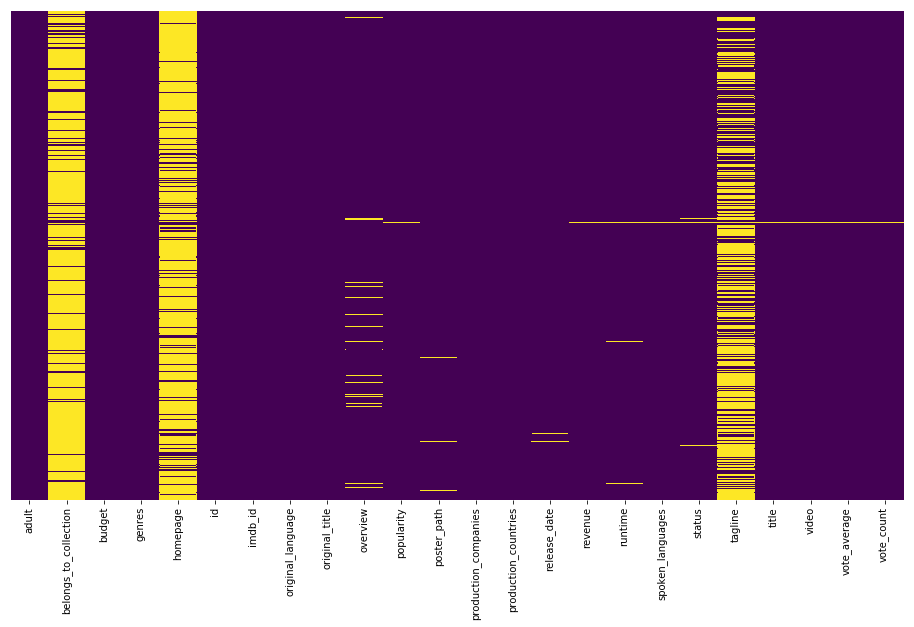

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(metadata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
metadata['vote_average'].fillna(value=0,inplace=True)

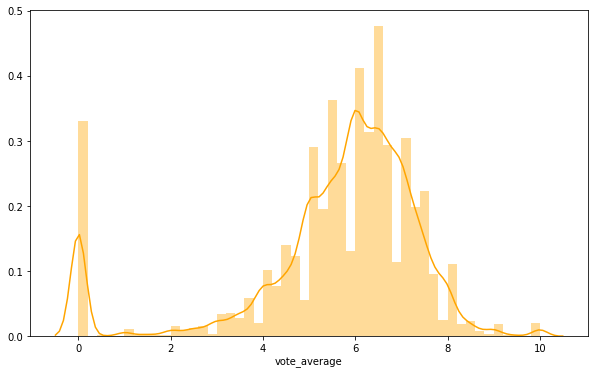

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(metadata['vote_average'],kde=True,color='orange')

In [10]:
metadata[metadata['vote_average']==0].vote_average.count()

3004

From the above graph, it is clear that 3,004 movies out of 45,466 does not ratings or were left empty.

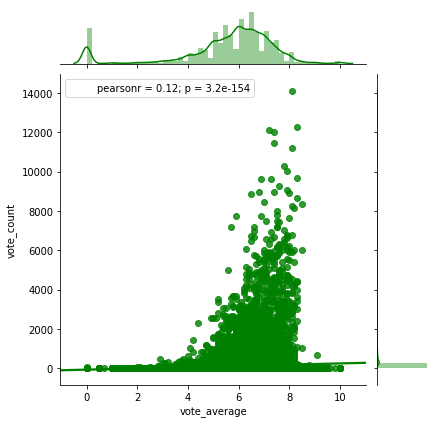

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x='vote_average',y='vote_count',data=metadata, color='green',kind='reg',dropna=True)

1. Most of the movies have very low number of vote_counts as compared vote_average. 
2. Also, the number of votes increases by a huge margin from around 4 to 8 and then sharply drops. This suggests that people are more likely to vote for movies that they enjoyed.

In [12]:
metadata['popularity'] = metadata['popularity'].convert_objects(convert_numeric=True)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45460 non-null float64
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null obje

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


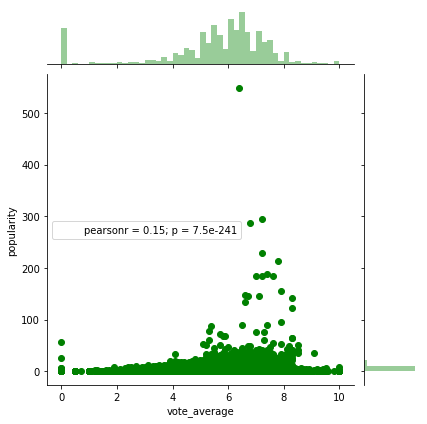

In [13]:
metadata['popularity'].fillna(value=0,inplace=True)
plt.figure(figsize=(10,10))
sns.jointplot(x='vote_average',y='popularity',data=metadata, color='green',kind='scatter',dropna=True)

Popularity seems to be a function of vote_average and vote_count. 

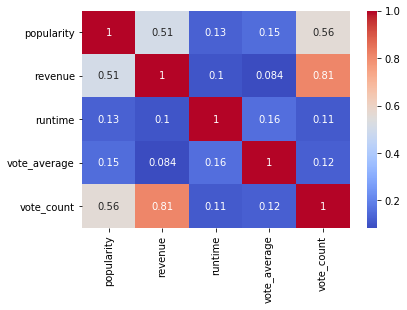

In [14]:
sns.heatmap(metadata.corr(), annot=True, cmap='coolwarm')

Vote_average has no significant correlation with any other number indicator. It would not make sense to create a predictive machine learning algorithms to develop a recommender system.

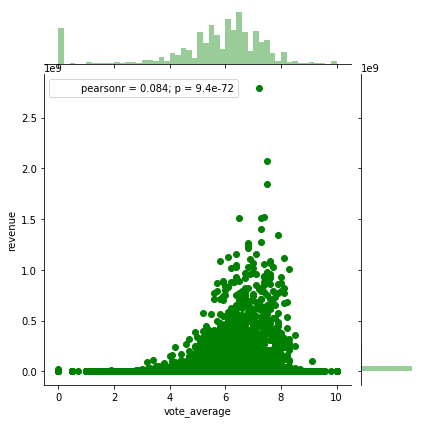

In [15]:
plt.figure(figsize=(10,10))
sns.jointplot(x='vote_average',y='revenue',data=metadata, color='green',kind='scatter',dropna=True,)

In [17]:
metadata[metadata['vote_count'].isnull()==True].count()

adult                    6
belongs_to_collection    4
budget                   6
genres                   6
homepage                 4
id                       6
imdb_id                  6
original_language        6
original_title           6
overview                 6
popularity               6
poster_path              3
production_companies     3
production_countries     3
release_date             3
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             6
vote_count               0
dtype: int64

# Simple Recommender

In [18]:
C = metadata['vote_average'].mean()
m = metadata['vote_count'].quantile(0.95)
print(C,' ', m)

5.617465798618454   434.0


In [19]:
qual_movies = metadata.copy().loc[metadata['vote_count']>=m]
qual_movies.shape

(2274, 24)

In [20]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(m+v)*C)

In [21]:
qual_movies['score'] = qual_movies.apply(weighted_rating,axis=1)

In [22]:
qual_movies = qual_movies.sort_values('score', ascending=False)

In [23]:
qual_movies[['title','vote_count','vote_average','score']].head(100)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.357709
834,The Godfather,6024.0,8.5,8.306284
12481,The Dark Knight,12269.0,8.3,8.208351
2843,Fight Club,9678.0,8.3,8.184867
292,Pulp Fiction,8670.0,8.3,8.172120
351,Forrest Gump,8147.0,8.2,8.069384
522,Schindler's List,4436.0,8.3,8.060940
23673,Whiplash,4376.0,8.3,8.057958
5481,Spirited Away,3968.0,8.3,8.035525
1154,The Empire Strikes Back,5998.0,8.2,8.025743


In [24]:
qual_movie_score = qual_movies[['title','vote_count','vote_average','score']]

In [25]:
indices2 = pd.Series(qual_movies.index, index=qual_movie_score['title']).drop_duplicates()

In [26]:
def weighted_score_model(title):
    movie_index = indices2.index.get_loc(title)

    movie_indices = [movie_index+i for i in range(1,11)]
    return qual_movies['title'].iloc[movie_indices]
    

In [27]:
weighted_score_model('The Dark Knight')

2843                  Fight Club
292                 Pulp Fiction
351                 Forrest Gump
522             Schindler's List
23673                   Whiplash
5481               Spirited Away
1154     The Empire Strikes Back
15480                  Inception
2211           Life Is Beautiful
18465           The Intouchables
Name: title, dtype: object

# Content Based Recommender

### Based on Overview text data

In [28]:
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [29]:
metadata = metadata.drop([28700])

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency-Inverse Document Frequency (TF-IDF) vectors 
tfidf = TfidfVectorizer(stop_words='english')
metadata['overview'] = metadata['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(metadata['overview'])
tfidf_matrix.shape

(45465, 75826)

In [31]:
#calculating the dot product will directly give you the cosine similarity score
#Hence use linear_kernel() instead of cosine_similarities()

from sklearn.metrics.pairwise import linear_kernel

In [32]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [33]:
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [34]:
# Function that takes in movie title as input and outputs most similar movies
def movie_overview_model(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [35]:
movie_overview_model('The Dark Knight',cosine_sim)

18252                                The Dark Knight Rises
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
21194    Batman Unmasked: The Psychology of the Dark Kn...
150                                         Batman Forever
20232              Batman: The Dark Knight Returns, Part 2
40974    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
41982    Batman Beyond Darwyn Cooke's Batman 75th Anniv...
19792              Batman: The Dark Knight Returns, Part 1
18035                                     Batman: Year One
Name: title, dtype: object

## Based on Credits, Keywords

In [36]:
credits = pd.read_csv('/Users/viveksasikumar/Downloads/credits.csv')
keywords = pd.read_csv('/Users/viveksasikumar/Downloads/keywords.csv')

metadata = metadata.drop([19730, 29503, 35587])

In [37]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

In [38]:
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [39]:
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [40]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

In [41]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [42]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [43]:
# Define new director, cast, genres and keywords features that are in a suitable form.
metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [44]:
metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [45]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [46]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)
    


In [47]:
metadata[['cast', 'keywords', 'director', 'genres']].head()

,cast,keywords,director,genres
0,"[tomhanks, timallen, donrickles]","[jealousy, toy, boy]",johnlasseter,"[animation, comedy, family]"
1,"[robinwilliams, jonathanhyde, kirstendunst]","[boardgame, disappearance, basedonchildren'sbook]",joejohnston,"[adventure, fantasy, family]"
2,"[waltermatthau, jacklemmon, ann-margret]","[fishing, bestfriend, duringcreditsstinger]",howarddeutch,"[romance, comedy]"
3,"[whitneyhouston, angelabassett, lorettadevine]","[basedonnovel, interracialrelationship, single...",forestwhitaker,"[comedy, drama, romance]"
4,"[stevemartin, dianekeaton, martinshort]","[baby, midlifecrisis, confidence]",charlesshyer,[comedy]


In [48]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [49]:
# Create a new soup feature
metadata['soup'] = metadata.apply(create_soup, axis=1)
print(metadata['soup'].head(10))

0    jealousy toy boy tomhanks timallen donrickles ...
1    boardgame disappearance basedonchildren'sbook ...
2    fishing bestfriend duringcreditsstinger walter...
3    basedonnovel interracialrelationship singlemot...
4    baby midlifecrisis confidence stevemartin dian...
5    robbery detective bank alpacino robertdeniro v...
6    paris brotherbrotherrelationship chauffeur har...
7     jonathantaylorthomas bradrenfro rachaelleighc...
8    terrorist hostage explosive jean-claudevandamm...
9    cuba falselyaccused secretidentity piercebrosn...
Name: soup, dtype: object


In [50]:
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', 10000)
metadata[['genres','cast','director']].head(10)

,genres,cast,director
0,"[animation, comedy, family]","[tomhanks, timallen, donrickles]",johnlasseter
1,"[adventure, fantasy, family]","[robinwilliams, jonathanhyde, kirstendunst]",joejohnston
2,"[romance, comedy]","[waltermatthau, jacklemmon, ann-margret]",howarddeutch
3,"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker
4,[comedy],"[stevemartin, dianekeaton, martinshort]",charlesshyer
5,"[action, crime, drama]","[alpacino, robertdeniro, valkilmer]",michaelmann
6,"[comedy, romance]","[harrisonford, juliaormond, gregkinnear]",sydneypollack
7,"[action, adventure, drama]","[jonathantaylorthomas, bradrenfro, rachaelleighcook]",peterhewitt
8,"[action, adventure, thriller]","[jean-claudevandamme, powersboothe, dorianharewood]",peterhyams
9,"[adventure, action, thriller]","[piercebrosnan, seanbean, izabellascorupco]",martincampbell


In [51]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])

In [52]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [53]:
# Reset index of your main DataFrame and construct reverse mapping as before
#metadata = metadata.reset_index()
indices1 = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [54]:
# Function that takes in movie title as input and outputs most similar movies
def movie_keywordcredits_model(title, cosine_sim=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices1[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices1 = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices1]

In [55]:
movie_keywordcredits_model('The Dark Knight', cosine_sim2)

18442    The Dark Knight Rises
10210            Batman Begins
9311                    Shiner
9874           Amongst Friends
7772                  Mitchell
11463             The Prestige
12319                   Hitman
24090                Quicksand
25038                 Deadfall
41062                     Sara
Name: title, dtype: object

In [56]:
movie_keywordcredits_model('Fight Club', cosine_sim2)

1648                          Ill Gotten Gains
3487                Jails, Hospitals & Hip-Hop
20553                                  Sundome
27277                          Home Sweet Home
32470                                     Joni
34335                               Yolngu Boy
34889                                  Το γάλα
44024    National Geographic American Blackout
13327      The Curious Case of Benjamin Button
43654                              The Citizen
Name: title, dtype: object

# Following are the 3 movie recommendation models

In [57]:
movie = input("Enter movie: ")

print('\nWeighted Score Model')
print(weighted_score_model(movie))

print('\nMovie Overview Model')
print(movie_overview_model(movie,cosine_sim))

print('\nMovie Keywords & Credits Model')
print(movie_keywordcredits_model(movie, cosine_sim2))

Enter movie: Speed

Weighted Score Model
31485    13 Hours: The Secret Soldiers of Benghazi
9541            The Life Aquatic with Steve Zissou
25467                                         Wild
15129                                The Last Song
24000                                    Coherence
1971                            Lady and the Tramp
16884                                    Insidious
7717                                       Shrek 2
993                                     Cinderella
24372                                  St. Vincent
Name: title, dtype: object

Movie Overview Model
5186                        Time Out
34029                     Divergence
13958               Three on a Couch
12488                Poor Boy's Game
20578                           Tabu
21457              The Terror Within
24859                   Love Is News
19163    Snow White and the Huntsman
28625                     Superfast!
44665                        The Fog
Name: title, dtype: object

Mo

## Which model do you think makes most sense?